# DIAMOND PRICE PREDICTION

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import LabelEncoder,RobustScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler, StandardScaler
from xgboost import XGBRegressor

## Loading Data

In [2]:
data = pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Preprocessing

In [3]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
print(f'x: {len(data[data.x==0])},   y: {len(data[data.y==0])},   z: {len(data[data.z==0])}')

x: 7,   y: 6,   z: 17


In [6]:
data = data.drop(data[data['x']==0].index)
data = data.drop(data[data['y']==0].index)
data = data.drop(data[data['z']==0].index)
data.shape

(49983, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49983 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49983 non-null  float64
 1   cut      49983 non-null  object 
 2   color    49983 non-null  object 
 3   clarity  49983 non-null  object 
 4   depth    49983 non-null  float64
 5   table    49983 non-null  float64
 6   price    49983 non-null  int64  
 7   x        49983 non-null  float64
 8   y        49983 non-null  float64
 9   z        49983 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


### Pairplot of the data

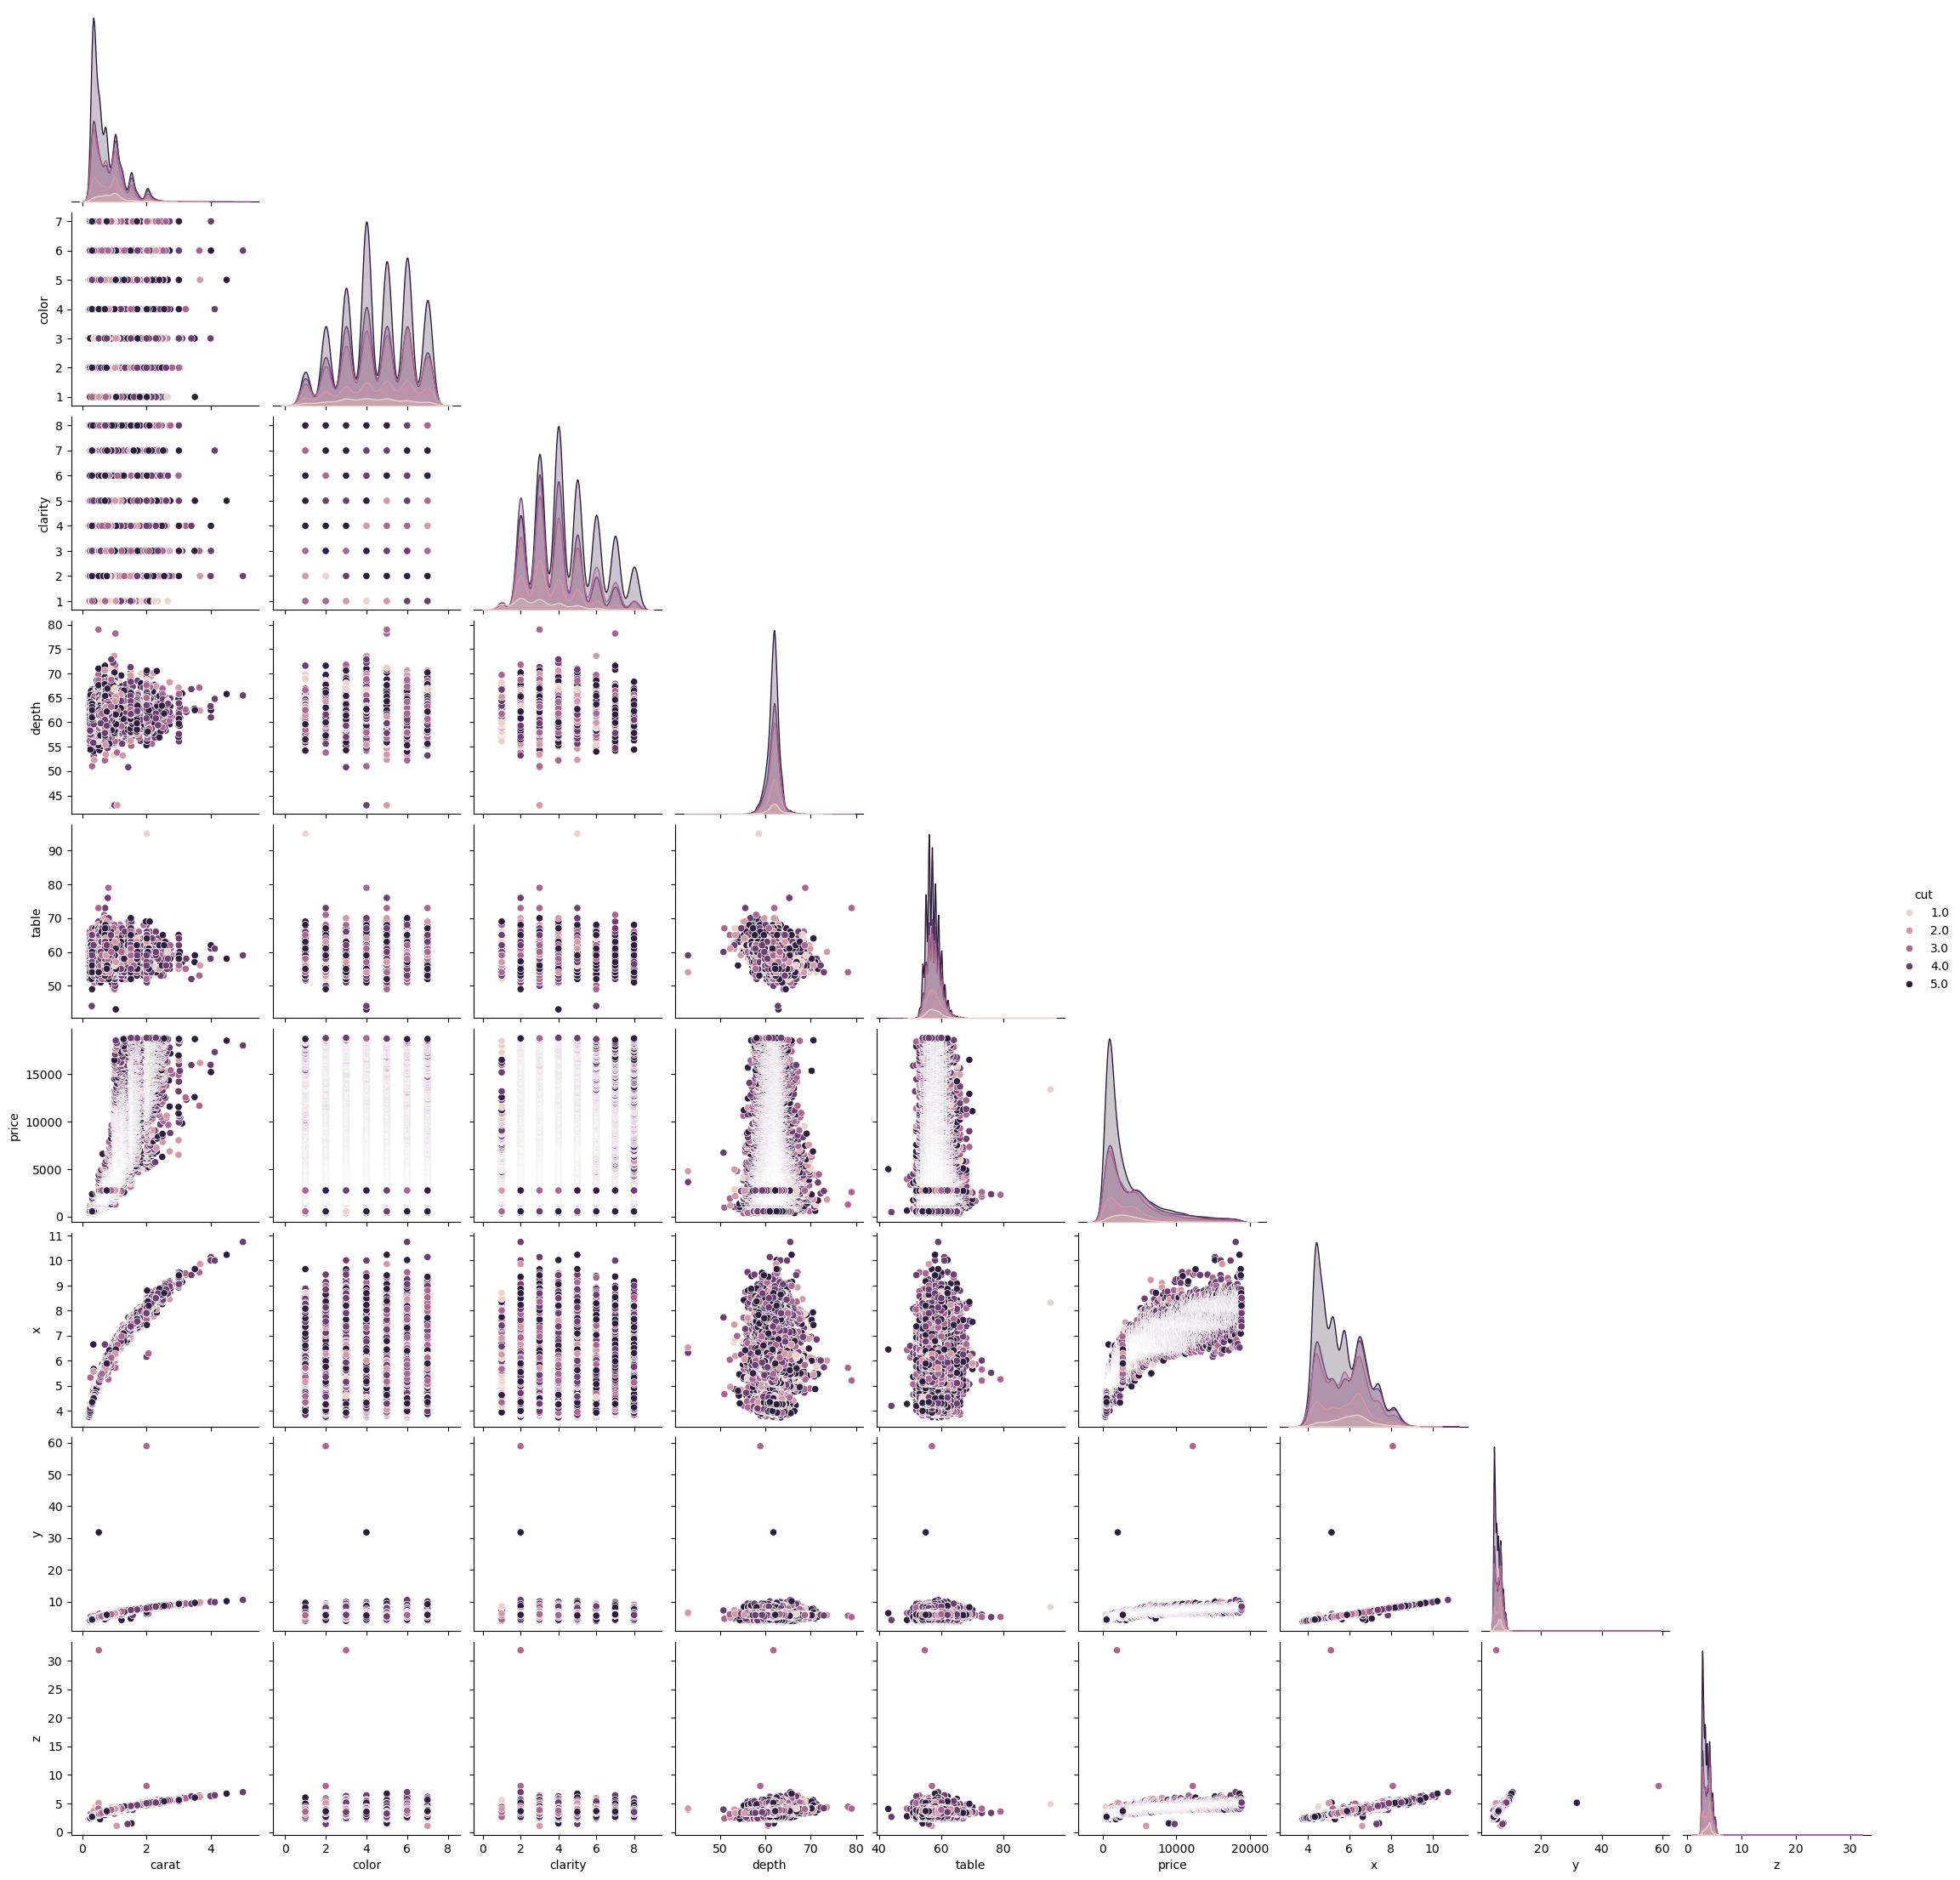

In [26]:
ax=sns.pairplot(data, hue= "cut", corner=True)

In [9]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [10]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

## Ordinal Encoding

In [12]:
encoder = OrdinalEncoder(categories= [['Fair', 'Good', 'Very Good','Premium','Ideal']])
data[['cut']] = pd.DataFrame(encoder.fit_transform(data[['cut']]))
data['cut'] = data.cut + 1
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5.0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4.0,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2.0,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4.0,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2.0,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
encoder = OrdinalEncoder(categories= [['J', 'I', 'H','G','F','E','D']])
data[['color']] = pd.DataFrame(encoder.fit_transform(data[['color']]))
data.color = data.color + 1
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5.0,6.0,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4.0,6.0,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2.0,6.0,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4.0,2.0,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2.0,1.0,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
encoder = OrdinalEncoder(categories= [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
data[['clarity']] = pd.DataFrame(encoder.fit_transform(data[['clarity']]))
data.clarity = data.clarity+1
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5.0,6.0,2.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4.0,6.0,3.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2.0,6.0,5.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4.0,2.0,4.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2.0,1.0,2.0,63.3,58.0,335,4.34,4.35,2.75


In [15]:
data.dropna(inplace=True)

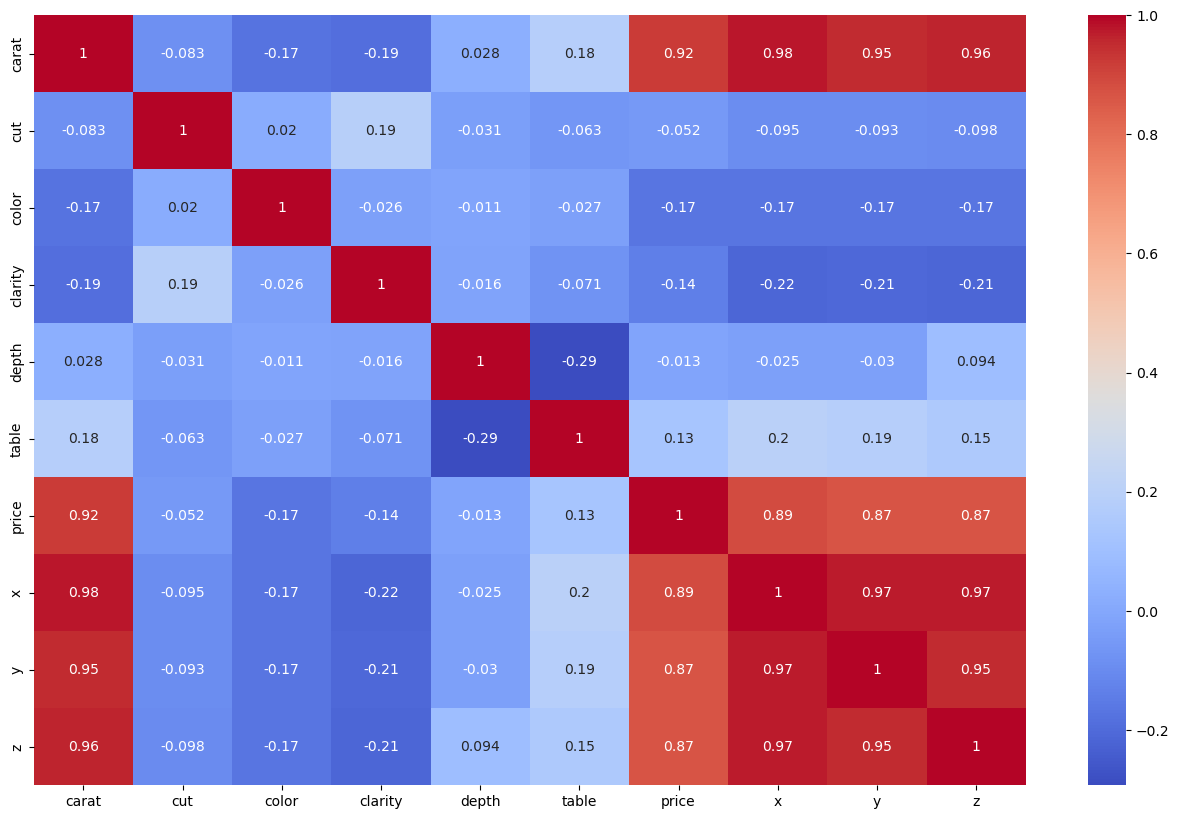

In [16]:
corr = data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.show()

## TRAIN TEST SPILT

In [17]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
data['price'] = data['price'].astype(float)

## Training Models

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'Decision tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators= 100),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

In [22]:
results=[]
for name,model in models.items():
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=10)
    results.append({
        'Model': name,
        'Cross Val Score': cv_score.mean()
    })


In [23]:
results = pd.DataFrame(results)
results

,Model,Cross Val Score
0,Linear Regression,0.812229
1,XGBoost,0.884961
2,Decision tree,0.773638
3,Random Forest,0.887577
4,K-Nearest Neighbors,0.865675


<Axes: xlabel='Model', ylabel='Cross Val Score'>

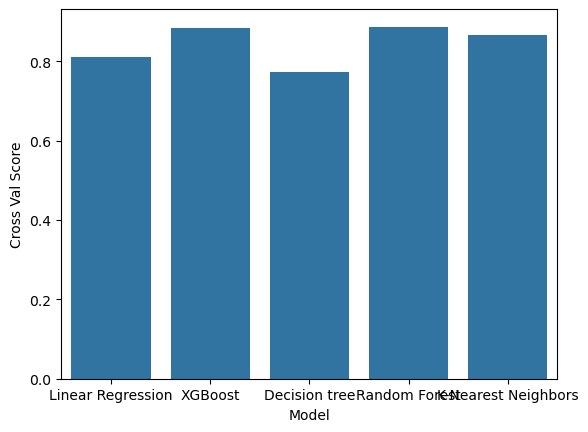

In [25]:
sns.barplot(results, x=results.Model, y= results['Cross Val Score'])